# Лабораторна робота №5
## Завдання 2

- Завантажити датасет «Student_data.csv».
- Реалізувати попередній аналіз:
    - Роздрукуввати перші 5 рядків;
    - Вивести розмір;
    - Вивести типи даних;
    - Перевірити на пропуски, замінити на середнє за стовпцем;
    - Видалити дублікати;
    - Вивести опис.
- Визначити, яку задачу розв'язувати (регресія чи класифікація).
- Побудувати модель на вибір для визначення оцінки. Підібрати оптимальні параметри.
- Оцінити моделі.
- Визначити методом ліктів і силуетів оптимальну кількіст кластерів.
- Візуалізувати кластери.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV


In [13]:
# Load the data
data = pd.read_csv("Student_data.csv")

data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
print(f'The shape of the data is:\n{data.shape}')
print(f'The data types are:\n{data.dtypes}')

The shape of the data is:
(2392, 15)
The data types are:
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [6]:
# Check for missing values
print(f'Missing values in the data:\n{data.isnull().sum()}')

# Check for duplicates
print(f'Duplicates in the data:\n{data.duplicated().sum()}')

Missing values in the data:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
Duplicates in the data:
0


In [7]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


Будемо будувати модель класифікації, де класом буде стовпчик «GradeClass». Приберемо не потрібні стовпчики як «StudentID».

In [26]:
# Drop Student ID
y = data['GradeClass'].copy()
X = data.drop(['StudentID', 'GradeClass'], axis=1).copy()

## Задача класифікації

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC(),
}

# Create dictionary of hyperparameters
params = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': [None, 'l2'],
        },
    'Decision Tree': {
        'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
        'min_samples_split': [2, 4, 6, 8, 10, 20, 40],
        'min_samples_leaf': [1, 2, 4, 8, 16, 32]
        },
    'SVC': {
        'C': [0.1, 1, 10],
        'gamma': [0.1, 0.01],
        'kernel': ['rbf']
        }
}

# Create a dictionary to store the best models
best_models = {}

# Train the models
best_models = {}
for key, classifier in classifiers.items():
    grid = GridSearchCV(classifier, params[key], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[key] = grid.best_estimator_
    print(f'{key} best parameters: {grid.best_params_}')

Logistic Regression best parameters: {'C': 10, 'penalty': 'l2'}


c:\Users\daniilsan\OneDrive - Київський національний торговельно-економічний університет\!Практичні\4-1\Машинне навчання\ML-Course-4\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Decision Tree best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}
SVC best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the models
for key, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f'{key} accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'{key} confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'{key} classification report:\n{classification_report(y_test, y_pred)}')
    print('--------------------------------------------------')

Logistic Regression accuracy: 0.7432150313152401
Logistic Regression confusion matrix:
[[  0  15   3   2   2]
 [  5  24  15   1   4]
 [  1  12  53  14   5]
 [  0   2  14  49  21]
 [  0   1   1   5 230]]
Logistic Regression classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.44      0.49      0.47        49
         2.0       0.62      0.62      0.62        85
         3.0       0.69      0.57      0.62        86
         4.0       0.88      0.97      0.92       237

    accuracy                           0.74       479
   macro avg       0.53      0.53      0.53       479
weighted avg       0.71      0.74      0.73       479

--------------------------------------------------
Decision Tree accuracy: 0.9123173277661796
Decision Tree confusion matrix:
[[ 14   1   3   2   2]
 [  1  43   0   1   4]
 [  1   2  74   4   4]
 [  0   2   2  75   7]
 [  0   4   0   2 231]]
Decision Tree classific

In [31]:
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)
X_sample = X_test[random_indices]
y_sample = y_test.iloc[random_indices]

y_sample_pred = best_models['Decision Tree'].predict(X_sample)

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Sample Index': random_indices,
    'Actual': y_sample,
    'Predicted': y_sample_pred
})

comparison_df

,Sample Index,Actual,Predicted
1833,287,4.0,4.0
2029,65,4.0,4.0
1480,409,1.0,1.0
1834,176,3.0,3.0
544,212,4.0,4.0
1005,97,4.0,4.0
932,283,4.0,4.0
618,404,3.0,3.0
670,253,4.0,4.0
2267,66,4.0,1.0


## Задача кластеризації

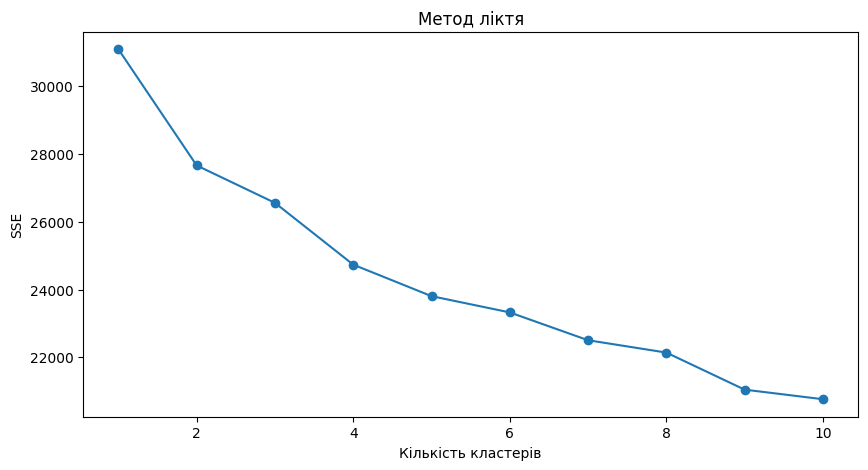

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_scaled = StandardScaler().fit_transform(X)

# Метод ліктя
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.title('Метод ліктя')
plt.show()

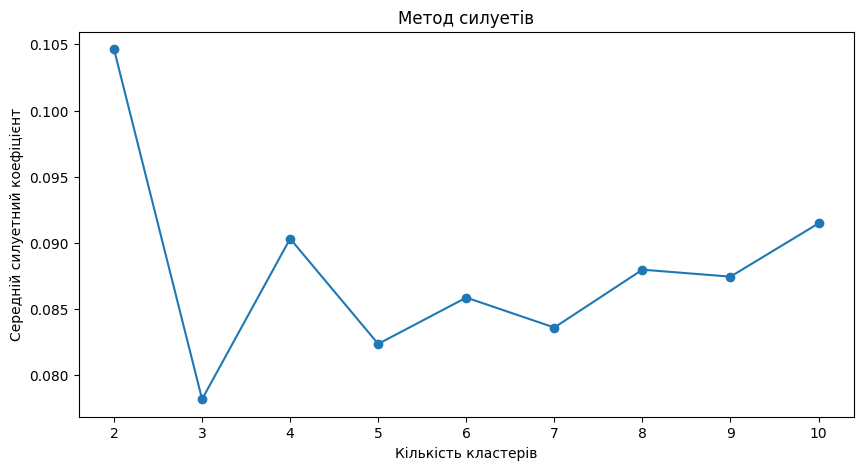

In [33]:
# Метод силуетів
silhouette_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній силуетний коефіцієнт')
plt.title('Метод силуетів')
plt.show()

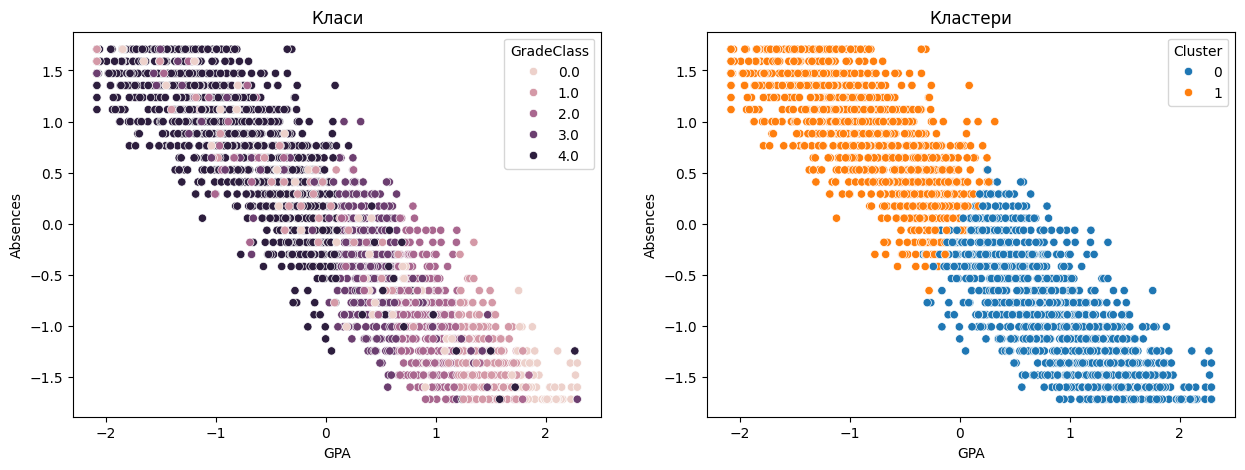

In [46]:
# Виконання кластеризації з оптимальною кількістю кластерів
optimal_clusters = 2 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(X_scaled)
labels = kmeans.labels_

cluster_df = pd.DataFrame({
    'Cluster': labels,
    'GradeClass': y,
    'GPA': X_scaled[:, 12],
    'Absences': X_scaled[:, 5]
})

# Візуалізація кластерів та класів
figs, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=cluster_df, x='GPA', y='Absences', hue='GradeClass', ax=axes[0])
axes[0].set_title('Класи')
sns.scatterplot(data=cluster_df, x='GPA', y='Absences', hue='Cluster', ax=axes[1])
axes[1].set_title('Кластери')
plt.show()

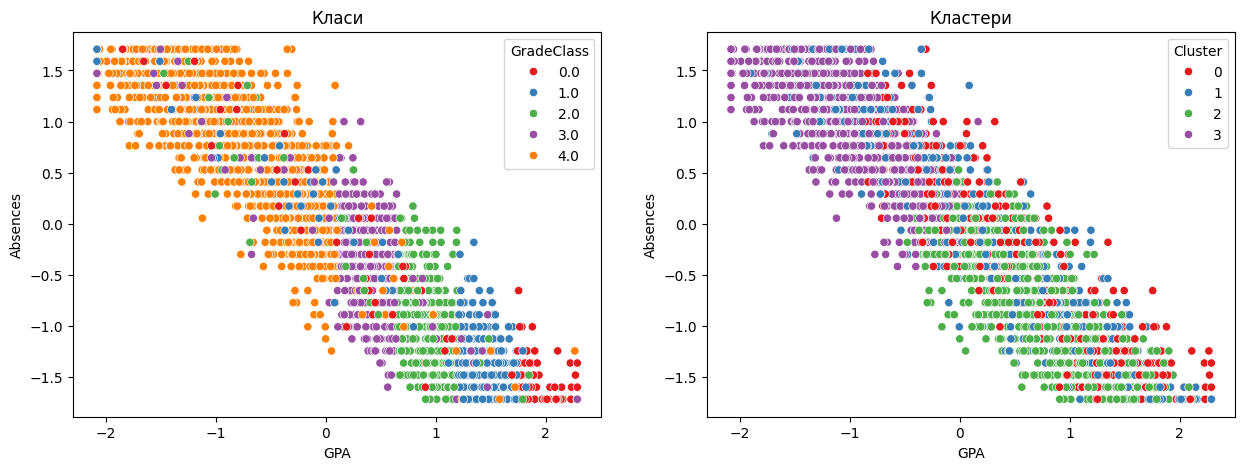

In [49]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(X_scaled)
labels = kmeans.labels_

cluster_df['Cluster'] = labels

# Візуалізація кластерів та класів
figs, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=cluster_df, x='GPA', y='Absences', hue='GradeClass', palette='Set1', ax=axes[0])
axes[0].set_title('Класи')
sns.scatterplot(data=cluster_df, x='GPA', y='Absences', hue='Cluster', palette='Set1', ax=axes[1])
axes[1].set_title('Кластери')
plt.show()